In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential

In [4]:
dataset_train = pd.read_csv('trainset.csv')

In [5]:
print(dataset_train.columns)
print(dataset_train.head())

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
         Date        Open        High         Low       Close   Adj Close  \
0  2013-01-02  357.385559  361.151062  355.959839  359.288177  359.288177   
1  2013-01-03  360.122742  363.600128  358.031342  359.496826  359.496826   
2  2013-01-04  362.313507  368.339294  361.488861  366.600616  366.600616   
3  2013-01-07  365.348755  367.301056  362.929504  365.001007  365.001007   
4  2013-01-08  365.393463  365.771027  359.874359  364.280701  364.280701   

    Volume  
0  5115500  
1  4666500  
2  5562800  
3  3332900  
4  3373900  


In [6]:
train_set = dataset_train.iloc[:, 1:2].values  # Assuming the 'Open' price is the second column

In [7]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(train_set)

In [8]:
X_train_array = []
y_train_array = []
for i in range(60, len(training_set_scaled)):
    X_train_array.append(training_set_scaled[i-60:i, 0])  # Previous 60 timesteps
    y_train_array.append(training_set_scaled[i, 0])  # The next timestep as label
X_train, y_train = np.array(X_train_array), np.array(y_train_array)

In [9]:
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [10]:
length = 60
n_features = 1

In [11]:
model = Sequential()
model.add(layers.LSTM(units=50, return_sequences=True, input_shape=(length, n_features)))
model.add(layers.LSTM(units=50, return_sequences=False))
model.add(layers.Dense(units=25))
model.add(layers.Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
print("Name: Aakash P\nRegister Number:212222110001\n")
model.summary()

Name: Aakash P
Register Number:212222110001



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.fit(X_train1, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0831
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0020
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 8.3754e-04
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 6.9357e-04
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 8.3649e-04
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 7.0648e-04
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 7.0717e-04
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 7.7072e-04
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 6.5259e-04
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 6.8462e-04
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 7.8440e-04
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 6.3185e-04
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 5.7167e-04
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 5.7013e-04
Epoch 15/

In [16]:
dataset_test = pd.read_csv('testset.csv')

In [24]:
test_set = dataset_test.iloc[:, 1:2].values
test_set.shape

(125, 1)

In [25]:
dataset_train = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
y_test = []
for i in range(60,1384):
    X_test.append(inputs_scaled[i-60:i,0])
    y_test.append(inputs_scaled[i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
X_test.shape


(1324, 60, 1)

In [26]:
X_test.shape

(1324, 60, 1)

In [27]:
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


Name: Aakash P , Register Number: 212222110001


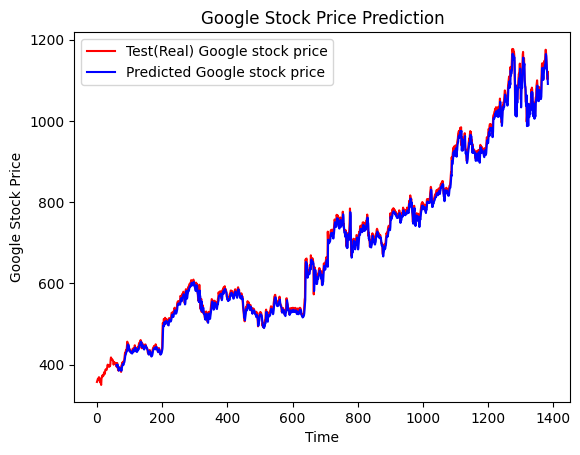

In [29]:
print("Name: Aakash P , Register Number: 212222110001")
plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [30]:
from sklearn.metrics import mean_squared_error as mse
print('Aakash P')
print(mse(y_test,predicted_stock_price))


Aakash P
529462.1180748679
